<a href="https://colab.research.google.com/github/swaroop-2007/ds_salary_prediction/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
url = 'https://github.com/swaroop-2007/ds_salary_prediction/blob/main/Cleaned_data.csv?raw=true'
df = pd.read_csv(url)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,maxsalary,averagesalary,Company,state,same_state,age,python y/n,spark y/n,excel y/n,aws y/n
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research\n,NM,0,49,1,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,KnowBe4\n,FL,1,12,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,PNNL\n,WA,1,57,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,Affinity Solutions\n,NY,1,24,1,0,1,0


In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hoursalary', 'employeerprovided', 'minsalary', 'maxsalary',
       'averagesalary', 'Company', 'state', 'same_state', 'age', 'python y/n',
       'spark y/n', 'excel y/n', 'aws y/n'],
      dtype='object')

In [32]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

### Used to retrieve job titles and seniorities

In [33]:
df['jobsimp'] = df['Job Title'].apply(title_simplifier)
df.jobsimp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: jobsimp, dtype: int64

In [34]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()


na        520
senior    220
jr          2
Name: seniority, dtype: int64

### Eliminating state LA to CA

In [35]:
df['state'] = df['state'].apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df['state']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: state, Length: 742, dtype: object

In [36]:
df['lengthOfDescription'] = df['Job Description'].apply(lambda x: len(x))
df['lengthOfDescription']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: lengthOfDescription, Length: 742, dtype: int64

In [37]:
#Calculating the number of competitiors for a job role

df['Competitors']
df['numberofCompetitors'] = df['Competitors'].apply(lambda x: len(x.split(','))if x != '-1' else 0)

In [38]:
df['Company']
#Removing "\n from Name of Companies"
df['Company'] = df['Company'].apply(lambda x: x.replace('\n', ''))

In [39]:
df['Company']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company, Length: 742, dtype: object

## Conversion of monthly salary to annual salary

In [40]:
df['minsalary'] = df.apply(lambda x: x.minsalary*2 if x.hoursalary ==1 else x.minsalary, axis =1)
df['maxsalary'] = df.apply(lambda x: x.maxsalary*2 if x.hoursalary ==1 else x.maxsalary, axis =1)

#Mapping of The salaries
df[df.hoursalary ==1][['hoursalary','minsalary','maxsalary']]

,hoursalary,minsalary,maxsalary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


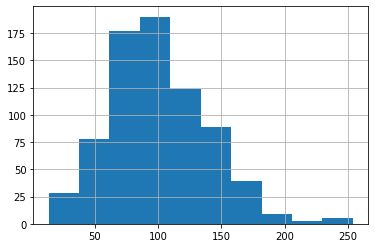

In [42]:
df['averagesalary'].hist()

### We can see a normal distribution across average salary of Data Scientists

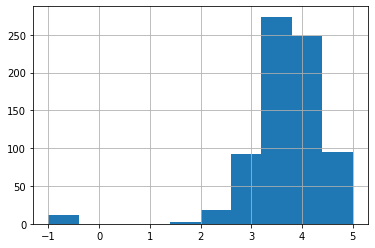

In [43]:
df['Rating'].hist()

### Apart from few outliers, we can see a normal distribution

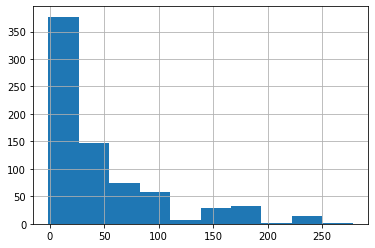

In [44]:
df['age'].hist()

### There is no normal distribution for Age

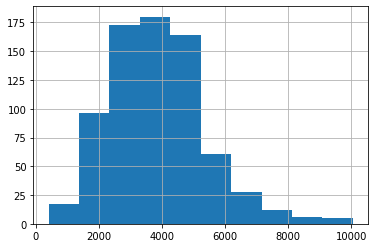

In [45]:
df['lengthOfDescription'].hist()

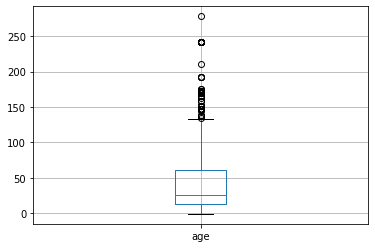

In [46]:
df.boxplot(column = "age")

### Tells us that there are few outliers of companies which are very old

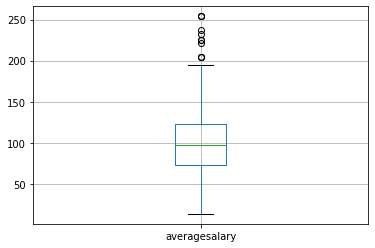

In [50]:
df.boxplot(column = "averagesalary")

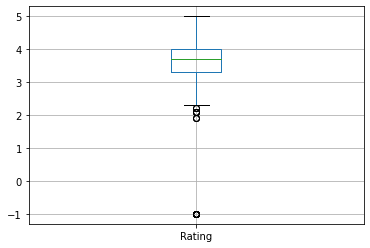

In [51]:
df.boxplot(column = "Rating")

## Finding Correlation between Age, Rating, Average Salary and Description Length i.e. Numeric Variables


In [64]:
a = df[['age','Rating','averagesalary','lengthOfDescription','numberofCompetitors']].corr()
a

,age,Rating,averagesalary,lengthOfDescription,numberofCompetitors
age,1.000000,0.024665,0.019492,0.164461,0.128272
Rating,0.024665,1.000000,0.013492,-0.012281,0.027190
averagesalary,0.019492,0.013492,1.000000,0.078808,0.093813
lengthOfDescription,0.164461,-0.012281,0.078808,1.000000,0.104620
numberofCompetitors,0.128272,0.027190,0.093813,0.104620,1.000000


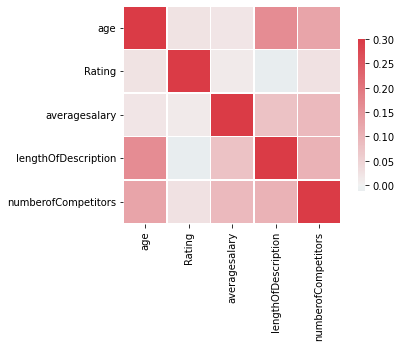

In [65]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(a, vmax=.3,cmap=cmap, center=0,square=True,linewidths=.5,cbar_kws={"shrink":.7})

### This heatmap and correlation will help us in reducing multi-colinearity in our ML model 

## Analysis of Categorical Variables

In [78]:
df_categorical = df[['Location', 'Size', 'Headquarters', 'Type of ownership', 'Sector','Industry','Revenue', 'Company', 'state','same_state', 'python y/n',
       'spark y/n', 'excel y/n', 'aws y/n', 'jobsimp', 'seniority', 'Company Name']]

### Drawing bar plots for categorical data

Graph for Location: total= 200


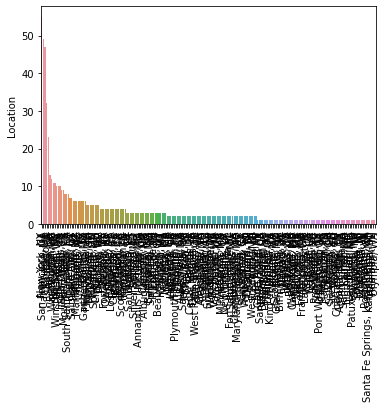

Graph for Size: total= 9


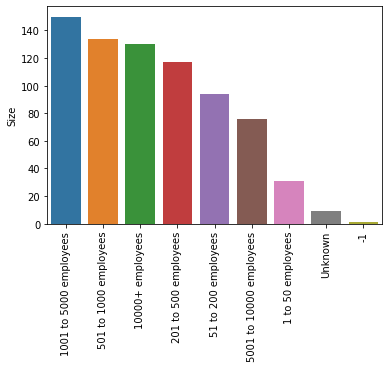

Graph for Headquarters: total= 198


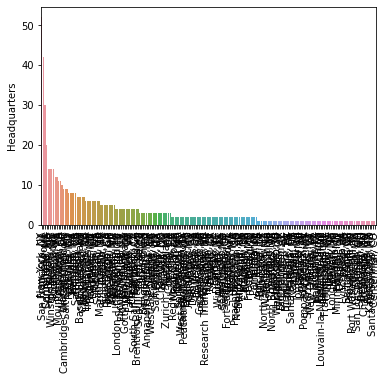

Graph for Type of ownership: total= 11


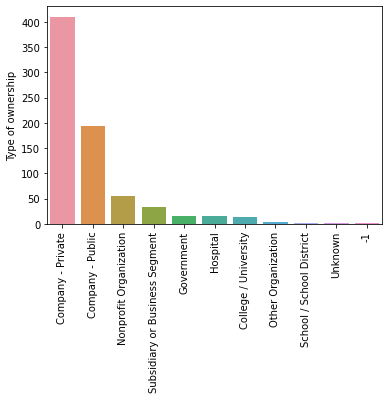

Graph for Sector: total= 25


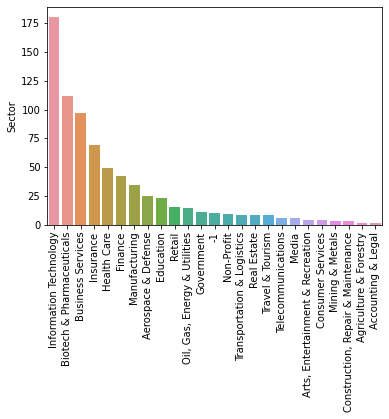

Graph for Industry: total= 60


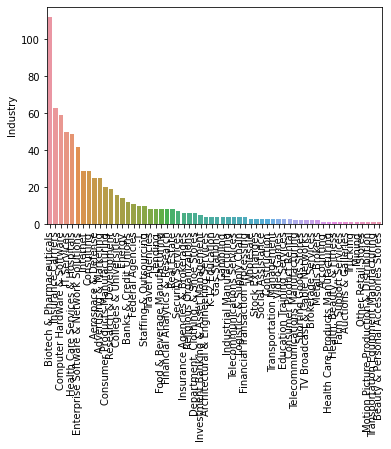

Graph for Revenue: total= 14


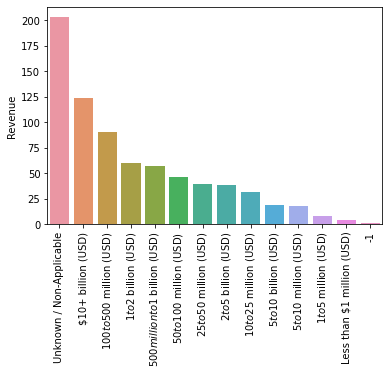

Graph for Company: total= 343


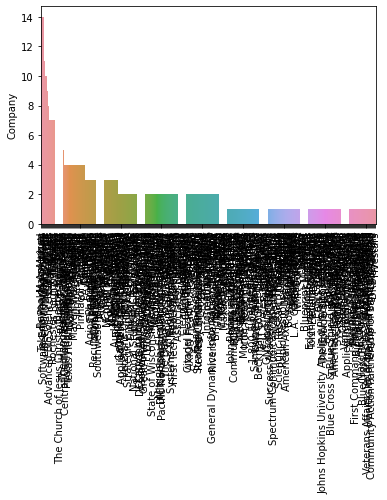

Graph for state: total= 37


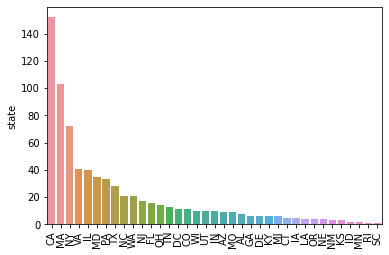

Graph for same_state: total= 2


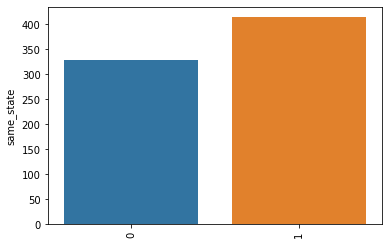

Graph for python y/n: total= 2


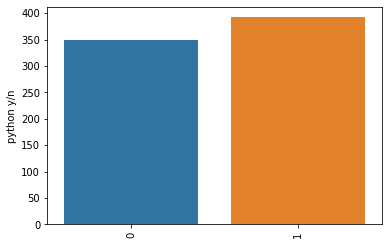

Graph for spark y/n: total= 2


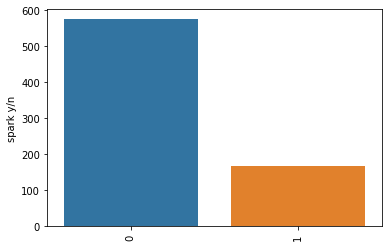

Graph for excel y/n: total= 2


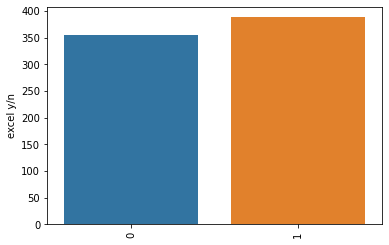

Graph for aws y/n: total= 2


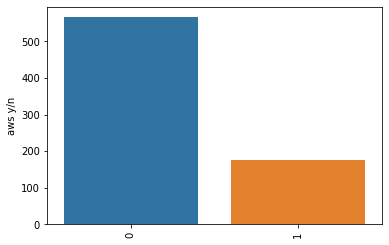

Graph for jobsimp: total= 7


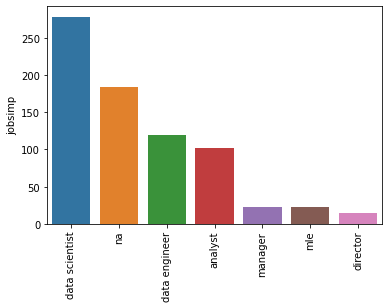

Graph for seniority: total= 3


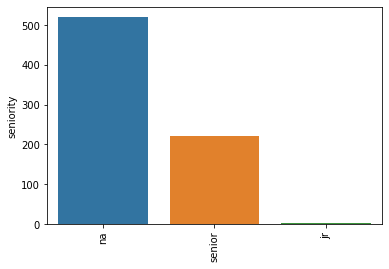

Graph for Company Name: total= 343


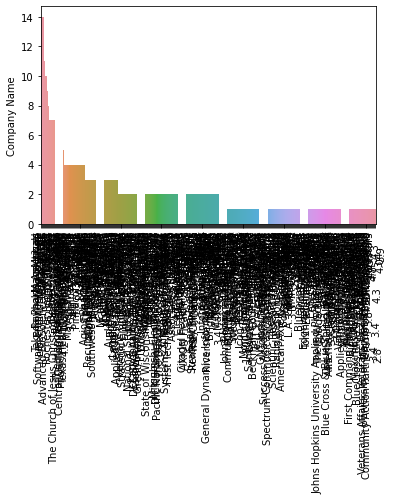

In [79]:
for i in df_categorical.columns:
  b = df_categorical[i].value_counts()
  print("Graph for %s: total= %d" %(i,len(b)))
  chart = sns.barplot(x=b.index, y=b)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

  plt.show()


Graph for Location: total= 20


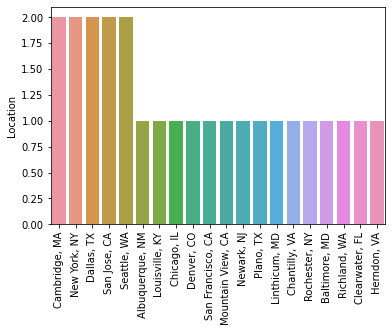

Graph for Headquarters: total= 19


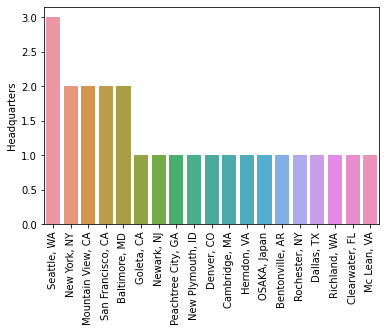

Graph for Company: total= 25


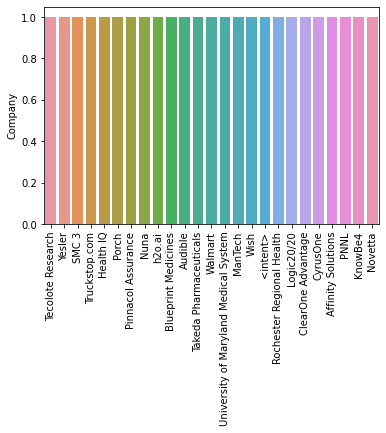

In [83]:
for i in df_categorical[['Location','Headquarters','Company']].columns:
  b = df_categorical[i][:25].value_counts()   #Taking top 25 of the above categorical data points to get a better display than previous bar plot
  print("Graph for %s: total= %d" %(i,len(b)))
  chart = sns.barplot(x=b.index, y=b)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

  plt.show()

In [86]:
pd.pivot_table(df, index= ['jobsimp','seniority'], values='averagesalary')  #To show the average salary based on the position and seniority


averagesalary
jobsimp        seniority               
analyst        jr             56.500000
               na             61.155405
               senior         79.092593
data engineer  na             96.701220
               senior        124.689189
data scientist jr            106.500000
               na            107.043011
               senior        138.956522
director       na            168.607143
manager        na             84.022727
mle            na            119.133333
               senior        142.071429
na             na             73.988189
               senior        109.061404

In [93]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['state','jobsimp'], values='averagesalary', aggfunc='count').sort_values('state', ascending=False)

averagesalary
state jobsimp                      
WI    na                          4
      data scientist              3
      analyst                     3
WA    na                          1
      data scientist             17
      analyst                     3
VA    na                          5
      mle                         2
      data scientist             18
      data engineer              10
      analyst                     6
UT    data engineer               3
      analyst                     4
      data scientist              3
TX    na                          7
      data scientist             13
      data engineer               8
TN    data scientist              1
      data engineer              10
      analyst                     2
SC    na                          1
RI    analyst                     1
PA    manager                     3
      data engineer               1
      data scientist              6
      analyst                     8
      mle                         7
      na                          8
OR    data scientist              3
      data engineer               1
OH    na                          3
      data scientist              7
      analyst                     4
NY    na                         12
      mle                         2
      data scientist             40
      data engineer               4
      analyst                    14
NM    data scientist              3
NJ    data scientist              4
      analyst                     6
      data engineer               2
      manager                     2
      director                    2
      na                          1
NE    na                          4
NC    na                         12
      data scientist              3
      data engineer               6
MO    na                          3
      manager                     1
      data scientist              3
      analyst                     2
MN    data engineer               1
      analyst                     1
MI    manager                     2
      data scientist              4
MD    na                         16
      data scientist             13
      data engineer               3
      analyst                     3
MA    na                         46
      manager                     5
      director                    6
      data scientist             30
      data engineer              12
      analyst                     4
LA    analyst                     1
      data engineer               2
      na                          1
KY    na                          4
      data scientist              2
KS    mle                         3
IN    na                          4
      data scientist              2
      data engineer               4
IL    analyst                     3
      na                          6
      mle                         2
      director                    6
      data scientist             15
      data engineer               8
ID    analyst                     2
IA    analyst                     2
      data engineer               3
GA    data scientist              3
      na                          3
FL    data scientist              7
      data engineer               3
      analyst                     6
DE    na                          6
DC    data scientist              5
      data engineer               4
      analyst                     2
CT    na                          3
      data scientist              2
CO    mle                         1
      data engineer               3
      analyst                     1
      na                          3
      data scientist              3
CA    na                         27
      mle                         5
      manager                     9
      data scientist             68
      data engineer              25
      analyst                    18
AZ    data scientist              1
      data engineer               5
      analyst             

In [95]:
pd.pivot_table(df[df.jobsimp=='data scientist'], index='state', values='averagesalary').sort_values('averagesalary', ascending=False)

,averagesalary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


### Largest average salary in DC for Data Scientist





In [115]:
df_pivottable = df[['Rating', 'Industry', 'Sector', 'Revenue', 'numberofCompetitors', 'hoursalary', 'employeerprovided', 'python y/n', 'spark y/n', 'aws y/n', 'excel y/n', 'Type of ownership', 'averagesalary']]
#df_pivottable.columns = df_pivottable.columns.get_level_values(0)



In [116]:
for i in df_pivottable.columns:
  print(i)
  print(pd.pivot_table(df_pivottable,index = i, values = 'averagesalary').sort_values('averagesalary', ascending = False))

Rating
        averagesalary
Rating               
-1.0       136.181818
 5.0       134.700000
 2.5       120.000000
 4.5       117.714286
 4.1       116.368421
 3.9       113.071429
 2.6       109.083333
 4.4       108.606061
 3.2       105.500000
 4.0       105.340426
 3.5       104.897959
 3.7       104.131148
 4.7       103.983871
 4.3       102.468750
 3.3       101.858974
 4.2       100.442308
 2.2        97.750000
 4.6        97.250000
 3.8        96.811475
 2.1        95.900000
 3.4        93.011364
 1.9        87.500000
 3.1        86.580000
 3.0        85.588235
 3.6        85.467391
 2.8        83.928571
 2.7        83.250000
 2.3        81.500000
 2.9        81.138889
 4.8        80.277778
 2.4        60.214286
Industry
                                          averagesalary
Industry                                               
Other Retail Stores                          163.500000
Motion Picture Production & Distribution     146.000000
Financial Analytics & Research    

ValueError: ignored

In [117]:
pd.pivot_table(df_pivottable, index = 'Revenue', columns = 'python y/n', values = 'averagesalary', aggfunc = 'count')

python y/n,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


### We can conclude that companies who have higher revenue need people who know Python
